In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt

In [180]:
df=pd.read_excel("Data Set.xlsx")
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [182]:
##since the target variable here is a combination of both cardspe1 + cardspent 2, we need to combine them both & remove the two,
##also check for the normality of the target variable
df["target"]=df.cardspent+df.card2spent
df.target

0        149.46
1         77.54
2        359.97
3        359.41
4        507.83
         ...   
4995    1425.67
4996     366.35
4997    1527.75
4998     752.95
4999     407.86
Name: target, Length: 5000, dtype: float64

In [185]:
##droppping the card 1 spend and card 2 spent variable since we only need the sum of thesse 2 variables as target features
df=df.drop(columns=['cardspent','card2spent'])
df

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,target
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,...,0,0,0,0,0,1,0,0,0,1425.67
4996,4699-LEPCCE-3UD,3,3.0,0,51,5,May,14,2,1,...,0,0,0,0,0,0,0,0,0,366.35
4997,8485-LLUICH-CVV,4,5.0,0,75,6,August,17,4,1,...,1,0,0,0,0,1,0,0,0,1527.75
4998,9325-URAAUT-7FA,1,1.0,0,47,4,December,19,4,2,...,0,1,1,1,0,1,0,0,0,752.95


In [187]:
df.target

0        149.46
1         77.54
2        359.97
3        359.41
4        507.83
         ...   
4995    1425.67
4996     366.35
4997    1527.75
4998     752.95
4999     407.86
Name: target, Length: 5000, dtype: float64

## we need to check whether the target variable follows normal distribution or not

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

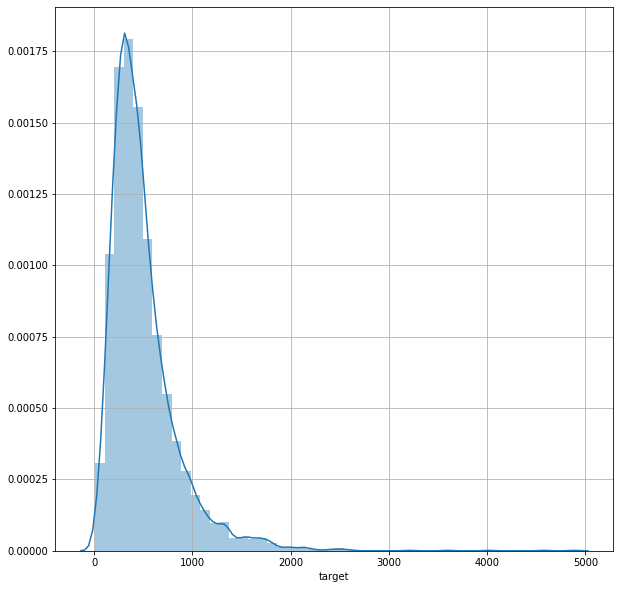

In [190]:
plt.figure(figsize=(10,10))
sns.distplot(df.target)
plt.grid()
plt.show()

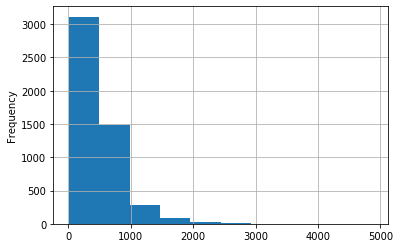

In [191]:
df["target"].plot(kind="hist")
plt.grid()
plt.show()

In [192]:
##it clearly shows from the above representation that the target variable doesnt follow normal distribution hence we need to
##apply a transformation to make it more normal

In [193]:
df["target"]=np.log(df.target)
df.target

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Name: target, Length: 5000, dtype: float64

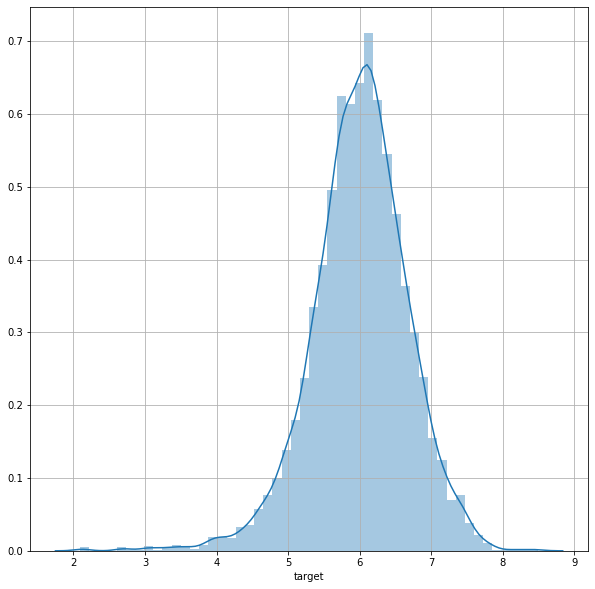

In [194]:
##checking for the normality for the transformed target variable
plt.figure(figsize=(10,10))
sns.distplot(df.target)
plt.grid()
plt.show()

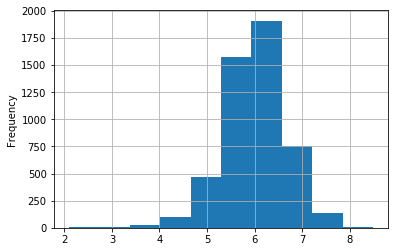

In [195]:
df["target"].plot(kind="hist")
plt.grid()
plt.show()

In [196]:
##the above figure displays a better normal distribution compared to the previous representations


In [197]:
##since the dataset is only in numeric format we need to define seperate categorical and numerical variables

In [204]:
## for categorical variables
for x in ["region","townsize","gender","agecat","birthmonth","edcat","jobcat","union","employ","empcat","retire","inccat","default","jobsat","marital","spousedcat","homeown","hometype","address","addresscat","cars","carown","cartype","carcatvalue","carbought","carbuy","commute",'commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
    df[x]=df[x].astype('object')

In [209]:
cat_vars=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ["object"]]
cat_vars

['custid',
 'region',
 'townsize',
 'gender',
 'agecat',
 'birthmonth',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',


In [212]:
cat_df=df[cat_vars]
##dropping the birthmonth and custif as its of no major use in future modelling steps
cat_df=cat_df.drop(columns=["custid","birthmonth"])
cat_df

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,3,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,4,2,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,2,2,0,16,5,0,...,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,3,2,0,0,1,0,...,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,3,2,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2,0,6,1,1,0,24,5,0,...,1,0,0,0,0,0,1,0,0,0
4996,3,3,0,5,2,1,0,6,3,0,...,1,0,0,0,0,0,0,0,0,0
4997,4,5,0,6,4,1,0,24,5,0,...,1,1,0,0,0,0,1,0,0,0
4998,1,1,0,4,4,2,0,3,2,0,...,1,0,1,1,1,0,1,0,0,0


# seperating numerical data as we did earlier for categorical

In [213]:
df.select_dtypes(["int64","float64","int32","float32"])

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,target
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,5.007029
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,4.350794
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,5.886021
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,5.884464
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,...,21.75,3.079614,1565.0,7.355641,0.00,NaN,0.00,NaN,19,7.262397
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,...,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14,5.903589
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,...,15.25,2.724580,1070.0,6.975414,0.00,NaN,0.00,NaN,16,7.331551
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,...,9.50,2.251292,345.0,5.843544,0.00,NaN,0.00,NaN,24,6.623999


In [214]:
##or it could be done as
num_vars=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in (["int64","float64","int32","float32"])]
num_vars

['age',
 'ed',
 'income',
 'lninc',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'spoused',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'carvalue',
 'commutetime',
 'tenure',
 'longmon',
 'lnlongmon',
 'longten',
 'lnlongten',
 'tollmon',
 'lntollmon',
 'tollten',
 'lntollten',
 'equipmon',
 'lnequipmon',
 'equipten',
 'lnequipten',
 'cardmon',
 'lncardmon',
 'cardten',
 'lncardten',
 'wiremon',
 'lnwiremon',
 'wireten',
 'lnwireten',
 'hourstv',
 'target']

In [215]:
num_data=df[num_vars]
num_data

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,target
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,5.007029
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,4.350794
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,5.886021
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,5.884464
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,...,21.75,3.079614,1565.0,7.355641,0.00,NaN,0.00,NaN,19,7.262397
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,...,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14,5.903589
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,...,15.25,2.724580,1070.0,6.975414,0.00,NaN,0.00,NaN,16,7.331551
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,...,9.50,2.251292,345.0,5.843544,0.00,NaN,0.00,NaN,24,6.623999


In [216]:
cat_vars

['custid',
 'region',
 'townsize',
 'gender',
 'agecat',
 'birthmonth',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',


In [223]:
##handling missing and outliers both in numerical and categorical data
num_data.isnull().sum().sort_values(ascending=False)

lnwireten         3656
lnwiremon         3656
lnequipmon        3296
lnequipten        3296
lntollten         2622
lntollmon         2622
lncardten         1422
lncardmon         1419
longten              3
lnlongten            3
cardten              2
commutetime          2
lncreddebt           1
lnothdebt            1
pets_cats            0
reside               0
spoused              0
pets_dogs            0
pets                 0
target               0
othdebt              0
pets_reptiles        0
creddebt             0
debtinc              0
lninc                0
income               0
ed                   0
pets_birds           0
tenure               0
pets_small           0
pets_saltfish        0
pets_freshfish       0
carvalue             0
hourstv              0
longmon              0
lnlongmon            0
tollmon              0
tollten              0
equipmon             0
equipten             0
cardmon              0
wiremon              0
wireten              0
age        

In [219]:
##we will define a function for both missing and outlier treatment
##below is for numerical data where we use mean//for categorical dta we will use mode//
def miss_trt(x):
    x=x.fillna(x.mean())
    return x

In [220]:
def cat_trt(x):
    x=x.fillna(x.mode())
    return x

In [222]:
num_data.isnull().sum().sort_values(ascending=False)

lnwireten         3656
lnwiremon         3656
lnequipmon        3296
lnequipten        3296
lntollten         2622
lntollmon         2622
lncardten         1422
lncardmon         1419
longten              3
lnlongten            3
cardten              2
commutetime          2
lncreddebt           1
lnothdebt            1
pets_cats            0
reside               0
spoused              0
pets_dogs            0
pets                 0
target               0
othdebt              0
pets_reptiles        0
creddebt             0
debtinc              0
lninc                0
income               0
ed                   0
pets_birds           0
tenure               0
pets_small           0
pets_saltfish        0
pets_freshfish       0
carvalue             0
hourstv              0
longmon              0
lnlongmon            0
tollmon              0
tollten              0
equipmon             0
equipten             0
cardmon              0
wiremon              0
wireten              0
age        

In [225]:
##dropping the columns which have more than 25% of missing data
num_data=num_data.drop(columns=["lnwireten","lnequipmon","lnwiremon","lnequipten","lntollten","lntollmon"])
num_data

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,target
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,29.50,126.10,14.25,2.656757,60.0,4.094345,0.00,0.00,13,5.007029
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,54.85,1975.00,16.00,2.772589,610.0,6.413459,45.65,1683.55,18,4.350794
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0.00,0.00,23.00,3.135494,1410.0,7.251345,0.00,0.00,21,5.886021
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,0.00,0.00,21.00,3.044522,685.0,6.529419,0.00,0.00,26,5.884464
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,0.00,0.00,17.25,2.847812,360.0,5.886104,19.05,410.80,27,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,...,0.00,0.00,21.75,3.079614,1565.0,7.355641,0.00,0.00,19,7.262397
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,...,0.00,0.00,26.25,3.267666,800.0,6.684612,27.90,757.35,14,5.903589
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,...,0.00,0.00,15.25,2.724580,1070.0,6.975414,0.00,0.00,16,7.331551
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,...,29.55,1032.85,9.50,2.251292,345.0,5.843544,0.00,0.00,24,6.623999


In [226]:
num_data.isnull().sum().sort_values(ascending=False)

lncardten         1422
lncardmon         1419
lnlongten            3
longten              3
cardten              2
commutetime          2
lnothdebt            1
lncreddebt           1
target               0
pets_dogs            0
pets_cats            0
pets                 0
reside               0
spoused              0
othdebt              0
pets_reptiles        0
creddebt             0
debtinc              0
lninc                0
income               0
ed                   0
pets_birds           0
pets_freshfish       0
pets_small           0
pets_saltfish        0
hourstv              0
carvalue             0
tenure               0
longmon              0
lnlongmon            0
tollmon              0
tollten              0
equipmon             0
equipten             0
cardmon              0
wiremon              0
wireten              0
age                  0
dtype: int64

In [227]:
##applying missing value treatment on the remaining data we have
num_data=num_data.apply(lambda x: miss_trt(x))
num_data.isnull().sum().sort_values(ascending=False)

target            0
spoused           0
pets_small        0
pets_reptiles     0
pets_birds        0
pets_dogs         0
pets_cats         0
pets              0
reside            0
lnothdebt         0
hourstv           0
othdebt           0
lncreddebt        0
creddebt          0
debtinc           0
lninc             0
income            0
ed                0
pets_saltfish     0
pets_freshfish    0
carvalue          0
commutetime       0
wireten           0
wiremon           0
lncardten         0
cardten           0
lncardmon         0
cardmon           0
equipten          0
equipmon          0
tollten           0
tollmon           0
lnlongten         0
longten           0
lnlongmon         0
longmon           0
tenure            0
age               0
dtype: int64

In [229]:
##we are done with cleaning the numerical data, lets do the same for categorical data
cat_df.isnull().sum().sort_values(ascending=False)

townsize       2
response_03    0
commutebus     0
carcatvalue    0
carbought      0
              ..
churn          0
tollfree       0
equip          0
callcard       0
region         0
Length: 83, dtype: int64

In [232]:
cat_df=cat_df.apply(lambda x: cat_trt(x))
cat_df.isnull().sum().sort_values(ascending=False)

townsize       2
response_03    0
commutebus     0
carcatvalue    0
carbought      0
              ..
churn          0
tollfree       0
equip          0
callcard       0
region         0
Length: 83, dtype: int64

In [236]:
##trying to fill in the missing values with median
cat_df.townsize=cat_df.townsize.fillna(cat_df.townsize.median())
cat_df.isnull().sum().sort_values(ascending=False)

response_03    0
carown         0
carcatvalue    0
carbought      0
carbuy         0
              ..
churn          0
tollfree       0
equip          0
callcard       0
region         0
Length: 83, dtype: int64

In [240]:
##outlier treatment for nuerical data
def out_trt(x):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    return x

In [242]:
num_data=num_data.apply(lambda x: out_trt(x))
num_data

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,target
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,29.50,126.10,14.25,2.656757,60.0,4.094345,0.00,0.00,13,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,54.85,1975.00,16.00,2.772589,610.0,6.413459,45.65,1683.55,18,4.350794
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0.00,0.00,23.00,3.135494,1410.0,7.251345,0.00,0.00,21,5.886021
3,23,16,20.0,2.995732,5.7,0.033160,-3.401644,1.117200,0.110826,18,...,0.00,0.00,21.00,3.044522,685.0,6.529419,0.00,0.00,26,5.884464
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,0.00,0.00,17.25,2.847812,360.0,5.886104,19.05,410.80,27,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,...,0.00,0.00,21.75,3.079614,1565.0,7.355641,0.00,0.00,19,7.262397
4996,51,14,83.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,...,0.00,0.00,26.25,3.267666,800.0,6.684612,27.90,757.35,14,5.903589
4997,75,17,108.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,...,0.00,0.00,15.25,2.724580,1070.0,6.975414,0.00,0.00,16,7.331551
4998,47,19,189.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,...,29.55,1032.85,9.50,2.251292,345.0,5.843544,0.00,0.00,24,6.623999


# dummy variable creation for the categorical variables

In [254]:
cat_new=pd.get_dummies(cat_df,columns=['region',
 'townsize',
 'gender',
 'agecat',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',
 'owngame',
 'ownfax',
 'news',
 'response_01',
 'response_02',
 'response_03'],drop_first=True)

# concatenating both numerical and categorical data

In [256]:
df_new=pd.concat([num_data,cat_new],axis=1)
df_new

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,0,0,0,1,1,0,0,0,1,0
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,1,1,1,1,1,1,1,0,0,0
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,1,0,0,0,0,0,1,0,0,0
3,23,16,20.0,2.995732,5.7,0.033160,-3.401644,1.117200,0.110826,18,...,1,0,1,1,1,0,1,1,0,0
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,...,1,0,0,0,0,0,1,0,0,0
4996,51,14,83.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,...,1,0,0,0,0,0,0,0,0,0
4997,75,17,108.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,...,1,1,0,0,0,0,1,0,0,0
4998,47,19,189.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,...,1,0,1,1,1,0,1,0,0,0


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

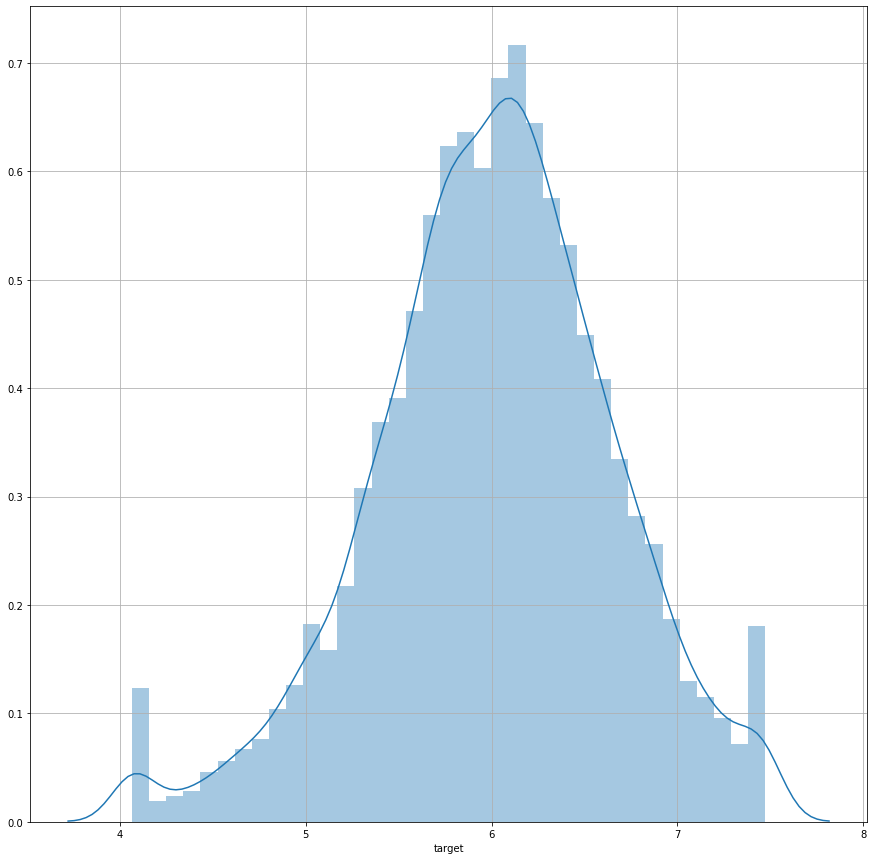

In [266]:
##checking the normality of the target variable and its relatiosnhip with the independent variables
plt.figure(figsize=(15,15))
sns.distplot(df_new.target)
plt.grid()
plt.show()

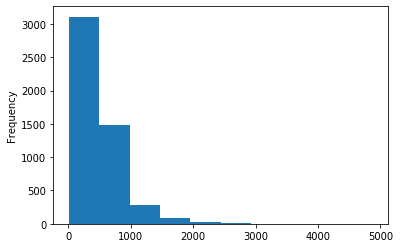

In [48]:
df_new.target.plot(kind="hist")
plt.show()

In [50]:
##it appears the target variable is not normally distributed hence we need to transform it in order to make it more 
##normally distributed
df_new['target']=np.log(df_new.target)
df_new['target']

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Name: target, Length: 4994, dtype: float64

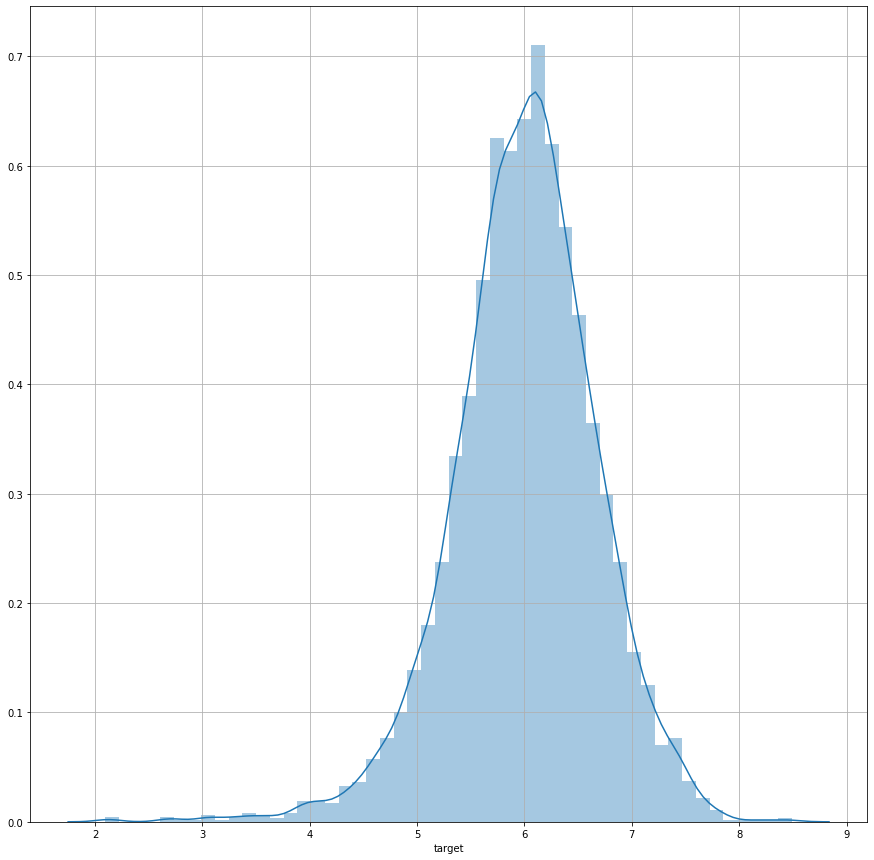

In [52]:
##checking again for the normality
plt.figure(figsize=(15,15))
sns.distplot(df_new.target)
plt.grid()
plt.show()

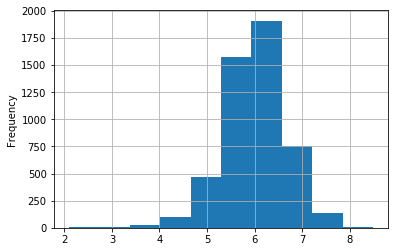

In [264]:
##histogram of the log target variable
df_new.target.plot(kind="hist")
plt.grid()
plt.show()

In [55]:
##log of the target variable seems to give a onormal distribution hence will be using it in further operations
##now we will be heading towards the outlier treatment

In [265]:
## missing value and outlier treatment has been done//we can proceed with feature selection part
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [357]:
##in order to properly select the features lets seperate the dependent and independent features
df_ind=df_new[df_new.columns.difference(['target'])]
df_ind

,active_1,address_1,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,...,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,wireless_1,wiremon,wireten
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,0.00,0.00
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,45.65,1683.55
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.00,0.00
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.00,0.00
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,19.05,410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.00,0.00
4996,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,27.90,757.35
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.00,0.00
4998,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.00,0.00


In [338]:
df_dep=df_new['target']
df_dep

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Name: target, Length: 5000, dtype: float64

In [270]:
rf=RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [271]:
##using gridsearch cv to get the best no of features to be used for modelling
from sklearn.model_selection import GridSearchCV

In [358]:
params={"n_estimators":np.arange(5,25)}
grid=GridSearchCV(rf,params,cv=2)
grid.fit(df_ind,df_dep)

C:\Users\sharm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not hav

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=24, n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [359]:
grid.best_params_

{'n_estimators': 22}

In [360]:
##now using Randomforrestregressor with 22 estimators to get the desred results
rf=RandomForestRegressor(oob_score=True,n_estimators=22)
rf.fit(df_ind,df_dep)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=22, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [361]:
rf.feature_importances_

array([2.71760242e-03, 4.83483276e-04, 8.45583353e-04, 3.58850585e-04,
       1.63585092e-03, 7.22294421e-04, 1.18548669e-03, 4.61583510e-04,
       4.25171887e-04, 1.94506012e-04, 6.27280737e-04, 6.71882772e-04,
       7.59718036e-04, 1.03179976e-03, 5.47556207e-04, 1.70290294e-03,
       1.25949391e-04, 6.49380276e-04, 1.02725204e-03, 5.89370169e-04,
       6.13527087e-04, 2.81877415e-04, 1.41421853e-03, 1.21038701e-03,
       4.05745061e-04, 7.87919972e-04, 3.09456382e-04, 5.47071736e-04,
       1.48099430e-04, 6.63874755e-04, 9.86446518e-05, 4.51808614e-04,
       2.78040154e-04, 5.18277841e-04, 1.26851906e-03, 3.74232963e-04,
       9.67923207e-05, 1.19811359e-04, 1.74207166e-04, 6.87946044e-04,
       7.09324196e-04, 1.75233385e-04, 2.05530631e-04, 2.25498971e-04,
       2.99777707e-05, 1.03020431e-03, 1.10738620e-06, 2.04009170e-05,
       7.76038256e-05, 0.00000000e+00, 0.00000000e+00, 3.40150352e-06,
       4.63046564e-07, 4.50196520e-04, 4.78131898e-04, 1.33673665e-03,
      

In [362]:
imp=pd.DataFrame()
imp["cols"]=df_ind.columns
imp["values"]=rf.feature_importances_
imp=imp.sort_values(by="values",ascending=False)
imp=imp.reset_index(drop=True)

In [363]:
imp

,cols,values
0,lninc,0.116808
1,income,0.068427
2,card_3,0.029519
3,carvalue,0.022756
4,commutetime,0.020751
...,...,...
377,employ_47,0.000000
378,employ_46,0.000000
379,address_53,0.000000
380,address_54,0.000000


In [364]:
##selecting the top most important features from the imp list
imp_feat=imp.loc[0:75,"cols"]
imp_feat

0            lninc
1           income
2           card_3
3         carvalue
4      commutetime
          ...     
71         bfast_3
72    commutecar_1
73      hometype_2
74       polview_4
75       employ_10
Name: cols, Length: 76, dtype: object

In [365]:
##selecting onnly the top 75 variables and using it in the dataset to check multicolinearity with the help of VIF
df_ind=df_ind[imp_feat]
df_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [366]:
vif=pd.DataFrame()
vif['features']=df_ind.columns
vif["values"]=[variance_inflation_factor(df_ind.values,i) for i in range(df_ind.shape[1])]
vif=vif.sort_values(by="values",ascending=False)
vif

,features,values
22,longmon,337.727418
25,lnlongmon,310.291608
19,lncardten,310.050773
21,lnlongten,286.834592
13,lncardmon,212.076849
...,...,...
51,card2fee_1,1.254213
43,townsize_3.0,1.242295
65,union_1,1.195972
70,commutebike_1,1.171498


In [367]:
##selecting the variables from the above vif df which have values greater than 10 and removing thme from the final datset
limp=vif[vif["values"]>10].loc[:,"features"]
limp.to_list()

['longmon',
 'lnlongmon',
 'lncardten',
 'lnlongten',
 'lncardmon',
 'longten',
 'lninc',
 'tenure',
 'pets',
 'ed',
 'cardten',
 'pets_freshfish',
 'cardmon',
 'income',
 'commutetime',
 'tollmon',
 'debtinc',
 'tollten',
 'age',
 'hourstv',
 'wiremon',
 'wireten',
 'equipmon']

In [368]:
vif=pd.DataFrame()
vif['features']=df_ind.columns
vif["values"]=[variance_inflation_factor(df_ind.values,i) for i in range(df_ind.shape[1])]
vif=vif.sort_values(by="values",ascending=False)
vif

,features,values
22,longmon,337.727418
25,lnlongmon,310.291608
19,lncardten,310.050773
21,lnlongten,286.834592
13,lncardmon,212.076849
...,...,...
51,card2fee_1,1.254213
43,townsize_3.0,1.242295
65,union_1,1.195972
70,commutebike_1,1.171498


In [349]:
limp1=vif[vif["values"]>10].loc[:,"features"].reset_index(drop=True)
limp1.to_list()
limp1

0            longmon
1          lnlongmon
2          lncardten
3          lnlongten
4          lncardmon
5            longten
6             tenure
7               pets
8     pets_freshfish
9                 ed
10           cardmon
11           cardten
12            income
13       commutetime
14           tollmon
15           debtinc
16           tollten
17               age
18           hourstv
19           wiremon
20       carbought_0
21          carvalue
22           wireten
23          equipmon
Name: features, dtype: object

In [369]:
vif[vif["values"]>10]

,features,values
22,longmon,337.727418
25,lnlongmon,310.291608
19,lncardten,310.050773
21,lnlongten,286.834592
13,lncardmon,212.076849
31,longten,183.829128
0,lninc,151.626279
16,tenure,85.761178
18,pets,36.661215
17,ed,33.378042


In [329]:
final_set=['longmon',
 'lnlongmon',
 'lncardten',
 'lnlongten',
 'lncardmon',
 'longten',
 'tenure',
 'pets',
 'pets_freshfish',
 #'ed',
 'cardmon',
 'cardten',
 'income',
 'commutetime',
 'tollmon',
 'debtinc',
 'tollten',
 #'age',
 'hourstv',
 'wiremon',
 'carvalue',
 'cartype_0',
 'cartype_1',
 'wireten',
 'equipmon']

In [371]:
df_ind=df_ind.drop(columns=['longmon',
 'lnlongmon',
 'lncardten',
 'lnlongten',
 'lncardmon',
 'longten',
 'tenure',
 'pets',
 'pets_freshfish',
 'ed',
 'cardmon',
 'cardten',
 'income',
 'commutetime',
 'tollmon',
 'debtinc',
 'tollten',
 'hourstv',
 'wiremon',
 'carvalue',
 
 'wireten',
 'equipmon'])
df_ind

,lninc,card_3,card_2,card_4,age,creddebt,reason_2,lncreddebt,othdebt,lnothdebt,...,jobcat_2,cardtype_2,card2benefit_3,card2type_4,commutebike_1,bfast_3,commutecar_1,hometype_2,polview_4,employ_10
0,3.433987,1,0,0,20,1.200909,0,0.183079,2.240091,0.806516,...,0,0,0,0,0,1,0,1,0,0
1,2.708050,0,1,0,22,1.222020,0,0.200505,1.567980,0.449788,...,1,0,1,0,1,0,1,0,1,0
2,3.555348,0,1,0,67,0.928620,1,-0.074056,2.536380,0.930738,...,1,0,1,0,0,1,1,0,0,0
3,2.995732,0,1,0,23,0.033160,0,-3.401644,1.117200,0.110826,...,1,0,0,0,0,0,1,0,0,0
4,3.135494,0,0,1,26,0.214659,0,-1.538705,0.176341,-1.735336,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5.278115,0,0,0,68,7.934080,0,2.071167,7.745920,2.047166,...,0,0,0,0,0,0,0,0,1,0
4996,4.418841,1,0,0,51,3.336600,0,1.204952,9.113400,2.209746,...,0,0,0,0,0,0,1,0,1,0
4997,4.682131,0,0,0,75,3.557520,0,1.269064,8.106480,2.092664,...,0,0,0,1,0,1,1,0,1,0
4998,5.241747,1,0,0,47,5.021352,0,1.613699,15.390648,2.733760,...,1,0,0,0,0,1,1,0,0,0


In [373]:
df_ind.lninc

0       3.433987
1       2.708050
2       3.555348
3       2.995732
4       3.135494
          ...   
4995    5.278115
4996    4.418841
4997    4.682131
4998    5.241747
4999    4.343805
Name: lninc, Length: 5000, dtype: float64

In [374]:
##splitting the data into train and test dats set
from sklearn.model_selection import train_test_split

In [376]:
train_x,test_x,train_y,test_y=train_test_split(df_ind,df_dep,test_size=0.3,random_state=123)

# building the model using ols

In [378]:
import statsmodels.api as smp

In [381]:
model_1=smp.OLS(train_y,train_x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              4316.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):                        0.00
Time:                        06:48:47   Log-Likelihood:                         -3853.8
No. Observations:                3500   AIC:                                      7816.
Df Residuals:                    3446   BIC:                                      8148.
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
lninc                1.0054      0.019     52.223      0.000       0.968       1.043
card_3              -0.1924      0.040     -4.823      0.000      -0.271      -0.114
card_2              -0.1763      0.040     -4.458      0.000      -0.254      -0.099
card_4              -0.3511      0.041     -8.620      0.000      -0.431      -0.271
age                  0.0107      0.001     13.734      0.000       0.009       0.012
creddebt             0.0057      0.010      0.594      0.553      -0.013       0.024
reason_2             0.8653      0.060     14.400      0.000       0.748       0.983
lncreddebt          -0.1114      0.019     -6.006      0.000      -0.148      -0.075
othdebt             -0.0250      0.006     -4.339      0.000      -0.036      -0.014
lnothdebt           -0.0868      0.023     -3.735      0.000      -0.132      -0.041
card_5              -0.0117      0.067     -0.175      0.861      -0.143       0.119
spoused             -0.0116      0.002     -5.408      0.000      -0.016      -0.007
card2_3             -0.0145      0.036     -0.402      0.688      -0.085       0.056
card2_2             -0.0383      0.036     -1.054      0.292      -0.110       0.033
equipten          -1.29e-05   1.61e-05     -0.801      0.423   -4.45e-05    1.87e-05
reside               0.1406      0.013     11.162      0.000       0.116       0.165
pets_cats            0.0533      0.015      3.520      0.000       0.024       0.083
pets_dogs            0.0095      0.017      0.556      0.578      -0.024       0.043
gender_1             0.0055      0.025      0.219      0.827      -0.044       0.055
card2_4             -0.0569      0.039     -1.443      0.149      -0.134       0.020
reason_9             0.5442      0.037     14.729      0.000       0.472       0.617
townsize_3.0        -0.0049      0.032     -0.150      0.881      -0.068       0.059
cardbenefit_2        0.0761      0.031      2.461      0.014       0.015       0.137
commutewalk_1        0.0632      0.026      2.448      0.014       0.013       0.114
region_5             0.0699      0.031      2.270      0.023       0.010       0.130
jobsat_4             0.0502      0.032      1.550      0.121      -0.013       0.114
carbuy_1             0.0871      0.026      3.347      0.001       0.036       0.138
active_1             0.1940      0.026      7.583      0.000       0.144       0.244
cardtype_3           0.1215      0.030      3.994      0.000       0.062       0.181
card2fee_1           0.0280      0.032      0.876      0.381      -0.035       0.091
cardbenefit_3        0.0925      0.030      3.059      0.002       0.033       0.152
commutecarpool_1     0.1275      0.028      4.549      0.000       0.073       0.182
cars_2   

In [386]:
model_1.pvalues.sort_values(ascending=False)

pets_small          9.503559e-01
townsize_3.0        8.805190e-01
card_5              8.614520e-01
commutebike_1       8.293659e-01
gender_1            8.267550e-01
card2_3             6.879866e-01
pets_dogs           5.783410e-01
creddebt            5.528586e-01
equipten            4.232582e-01
card2fee_1          3.810007e-01
card2_2             2.918426e-01
employ_10           1.653333e-01
card2_4             1.492089e-01
voice_1             1.334454e-01
jobsat_4            1.212521e-01
cars_2              5.176381e-02
region_5            2.325955e-02
commutewalk_1       1.441838e-02
polview_4           1.407298e-02
cardbenefit_2       1.391178e-02
union_1             6.261093e-03
cartype_1           6.018302e-03
cardbenefit_3       2.239425e-03
carbuy_1            8.264677e-04
card2type_2         4.683066e-04
pets_cats           4.367277e-04
lnothdebt           1.906957e-04
cardtype_2          8.982702e-05
cardtype_3          6.631710e-05
jobsat_2            5.187624e-05
card2type_

# checking for the model accuracy

In [388]:
from sklearn import metrics

In [391]:
train_pred=model_1.predict(train_x)
test_pred=model_1.predict(test_x)

print("train_mse:", metrics.mean_squared_error(train_y,train_pred))
print("test_mse:",metrics.mean_squared_error(test_y,test_pred))

train_mse: 0.5295673243402406
test_mse: 0.5265770086317567


In [392]:
##checking mae and rmse
print("mae:",metrics.mean_absolute_error(train_y,train_pred))
print("rmse:", np.sqrt(metrics.mean_squared_error(test_y,test_pred)))

mae: 0.5832450567547348
rmse: 0.7256562606577281


In [393]:
##chceking for the errors and its ditribution
errors=train_y-train_pred
errors

4036    0.608387
2883   -0.662716
4162   -0.898181
4640    0.891425
2430    2.322847
          ...   
1593   -1.007919
4060   -0.623296
1346    0.953942
3454   -0.207045
3582    1.245150
Length: 3500, dtype: float64

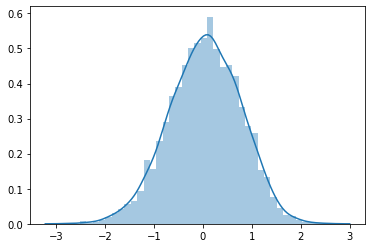

In [394]:
sns.distplot(errors)

In [ ]:
##the error rate also follows the normal distribution hence we have achieved a good relationship and a model for prediction of the credit card sales